In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
UNSUPERVISED = 'label.xlsx'
df = pd.read_excel(UNSUPERVISED, sheet_name='Sheet1')


In [3]:
kolom_numerik = [
    'Usia',
    'BMI',
    'Frekuensi_Olahraga',
    'Konsumsi_Rokok'
]




In [4]:
for kolom in kolom_numerik:
    df[kolom] = df[kolom].replace(',', '.', regex=True).astype(float)



In [5]:
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(df[kolom_numerik])



In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_distandarkan)
df['Cluster'] = kmeans.labels_


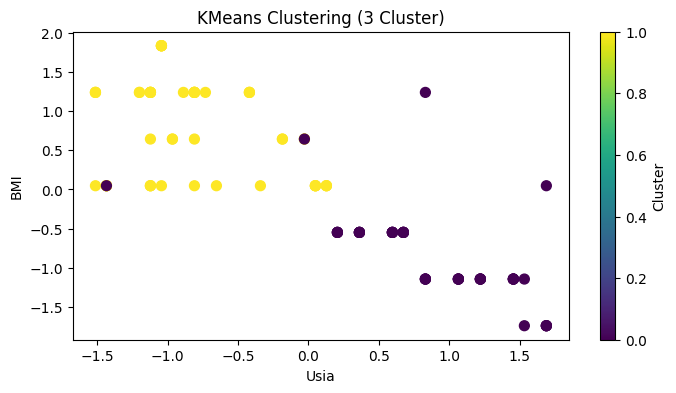

   Usia   BMI  Frekuensi_Olahraga  Konsumsi_Rokok  Cluster
0  59.0  39.0                 0.0             2.0        0
1  25.0  25.0                 5.0             2.0        1
2  29.0  24.0                 3.0             1.0        1
3  55.0  31.0                 1.0            10.0        0
4  47.0  28.0                 2.0             4.0        0


In [7]:
plt.figure(figsize=(8, 4))
plt.scatter(data_distandarkan[:, 0], data_distandarkan[:, 2], c=df['Cluster'], s=50, cmap='viridis')
plt.xlabel('Usia')
plt.ylabel('BMI')
plt.title('KMeans Clustering (3 Cluster)')
plt.colorbar(label='Cluster')
plt.show()

df.to_excel('labell.xlsx', index=False)
print(df.head())

In [8]:
df = pd.read_excel('labell.xlsx', sheet_name='Sheet1')
df


,Usia,BMI,Frekuensi_Olahraga,Konsumsi_Rokok,Cluster
0,59,39,0,2,0
1,25,25,5,2,1
2,29,24,3,1,1
3,55,31,1,10,0
4,47,28,2,4,0
...,...,...,...,...,...
95,34,24,5,0,1
96,58,32,1,12,0
97,48,30,2,5,0
98,21,37,3,0,0


In [9]:
x = df.iloc[:, 0:3]
y = df.iloc[:, 4]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE



In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [12]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42,k_neighbors=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [13]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

accuracy = model.score(x_test, y_test)
report = classification_report(y_test, y_pred, zero_division=1)


In [15]:

print('Accuracy: ', accuracy)
print('classification_report:\n', report)



Accuracy:  1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [16]:
label_map = {1: 'berisiko', 0: 'tidak berisiko'}


In [17]:
file_path = 'hasil prediksi naive bayes.xlsx'
result.to_excel(file_path, index=False)
print('Hasil prediksi berhasil disimpan di', file_path)


NameError: name 'result' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)




In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)



In [ ]:

print('Accuracy: ', accuracy)
print('Classification report:\n', report)

Accuracy:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
label_map = {1: 'berisiko', 0: 'tidak berisiko'}
print(label_map)

result = pd.DataFrame(y_pred, columns=['cluster'])

file_path = "Hasil prediksi SVM.xlsx"
result.to_excel(file_path, index=False)

print('Hasil prediksi berhasil disimpan di', file_path)


{1: 'berisiko', 0: 'tidak berisiko'}
Hasil prediksi berhasil disimpan di Hasil prediksi SVM.xlsx


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)



In [ ]:
print('Accuracy: ', accuracy)
print('Classification report:\n', report)

Accuracy:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

